In [1]:
import numpy as np
import scipy.integrate as intg
import scipy.signal as sig
import scipy.optimize as opt
import os
import fnmatch as fm
import re
import scan_functions as sf
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

In [2]:
# importing the with O2 testing data as wox
# importing the without O2 testing data as nox
# data file path is to the two folders that are WITHIN the working directory
wox = dict()
nox = dict()
# the bad guys are the ones that dont have glass/flat on the left
rev_wox = np.array(['s2t5','s2t6','s2t7','s3t4','s3t5','s3t6','s4t6','s4t7','s4t8','s4t9','s4t10','s6t1','s6t2','s6t3','s6t4','s6t5','s6t6','s6t7','s6t8','s6t9'])
# bad_nox = np.array(['']) dont think there are any, yay me :)
wox = sf.scan_dict(wox,'./al2o3_O2_testing_12-2-19/',bad_bois=rev_wox)
nox = sf.scan_dict(nox,'./al2o3_no-O2_testing_12-19-19/')
# make sure all data is in mircometers
wox = sf.make_x_micro(wox)
nox = sf.make_x_micro(nox)

In [3]:
# the bad scans
bad_wox = np.array(['s1t3','s3t3','s3t4','s3t6','s4t2','s4t3','s4t5','s4t10','s5t2','s5t4','s6t1','s6t3','s7t1','s8t1','s8t3','s6t9','s6t8','s6t7','s6t6','s6t5','s6t4','s4t9','s4t8','s4t7','s4t6','s2t7','s2t6','s2t5'])
bad_nox = np.array(['s1t5','s2t1','s2t2','s2t4','s2t5','s3t1','s3t2','s3t3','s4t2','s4t4','s4t5','s5t3','s5t4','s5t5','s5t6','s6t1','s6t2','s6t4','s6t5','s7t1','s7t4','s7t5','s8t1','s8t3','s8t5'])

In [4]:
# wox variables for 'sp_analysis_hard'
# will wanna revisit these after i apply new data adjustments
w_xfa = np.array([.4,.45,.45,.2,.4,
                  .4,.4,.45,.45,.6,.55,.6,
                  .45,.3,.3,.25,.25,.25,
                  .4,.3,.35,.3,.35,.6,.5,.5,.55,.55,
                  .4,.4,.5,.4,.4,.4,
                  .9,.45,.7,.7,.6,.6,.6,.65,.65,
                  .4,.3,.4,.4,.3,
                  .3,.3,.35,.4])
w_xib = np.array([.65,.7,.6,.8,.65,
                 .7,.55,.7,.6,.9,.85,.9,
                 .65,.4,.55,.4,.45,.4,
                 .5,.45,.5,.6,.7,.8,.7,.7,.75,.75,
                 .65,.55,.65,.6,.65,.55,
                 1.1,.6,.9,.9,.9,.9,.85,.85,.85,
                 .5,.45,.55,.6,.55,
                 .5,.45,.6,.65])
# w_xfb = np.array([(w_xib[i]+.4) for i in range(len(w_xib))])
w_xfb = np.array([1.2,.9,.8,1.2,1.,
                 1.,.95,1.4,1.5,1.5,1.75,1.75,
                 1.1,1.,.8,1.,1.,.8,
                 1.,.8,.65,1.1,.75,1.65,1.75,1.75,1.75,1.75,
                 1.7,.85,.9,.75,1.,1.05,
                 1.4,1.,1.05,1.25,1.15,1.4,1.4,1.25,1.45,
                 .7,.85,1.2,1.15,1.1,
                 .8,.85,.85,1.05])

In [5]:
# nox variables for 'sp_analysis_hard'
# sample: runs, this will help hella
# ^ 1:5, 2:6, 3:6, 4:6, 5:6, 6:6, 7:6, 8:5
# set that needs xia: s2t1
n_xfa = np.array([.55,.4,.4,.55,.65,
                 .45,.35,.4,.45,.45,.35,
                 .3,.35,.4,.4,.4,.4,
                 .5,.3,.3,.4,.4,.35,
                 .3,.3,.35,.45,.4,.4,
                 .35,.3,.3,.35,.4,.4,
                 .45,.35,.4,.3,.4,.3,
                 .4,.4,.4,.3,.3])
n_xib = np.array([.7,.5,.5,.7,.7,
                 .55,.45,.6,.65,.6,.55,
                 .5,.6,.6,.6,.65,.65,
                 .6,.6,.6,.55,.6,.55,
                 .45,.45,.45,.6,.6,.6,
                 .45,.45,.5,.55,.6,.55,
                 .6,.55,.6,.45,.55,.45,
                 .5,.55,.6,.45,.45])
n_xfb = np.array([1.3,1.35,1.35,1.6,1.65,
                 1.35,1.35,1.,1.7,1.7,1.,
                 1.35,1.,1.3,1.8,1.75,1.8,
                 1.75,1.75,1.75,1.4,1.,1.4,
                 1.4,1.4,1.4,1.75,1.7,1.75,
                 1.4,1.4,1.4,1.75,1.75,1.7,
                 1.75,.9,1.75,1.4,1.4,.6,
                 1.75,1.35,1.75,1.4,1.4])

In [6]:
wox = sf.sp_analysis_hard(wox,8,w_xfa,w_xib,w_xfb)
nox = sf.sp_analysis_hard(nox,8,n_xfa,n_xib,n_xfb)
# wox = sf.sp_analysis_v2(wox,8,bad_wox,w_xfa,w_xib,w_xfb)
# nox = sf.sp_analysis_v2(nox,8,bad_nox,n_xfa,n_xib,n_xfb)

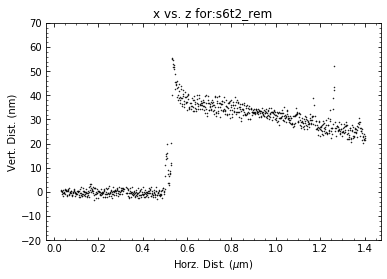

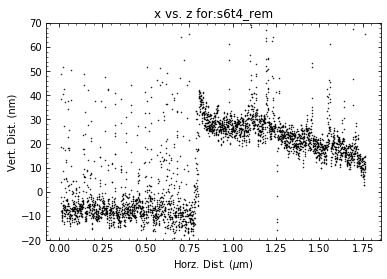

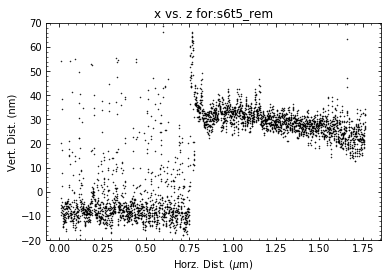

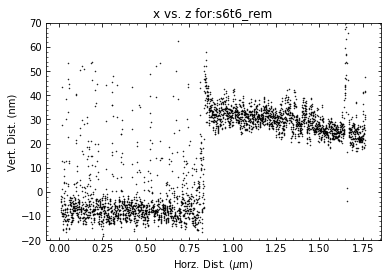

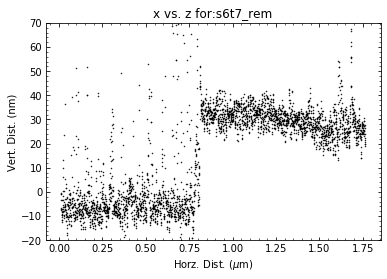

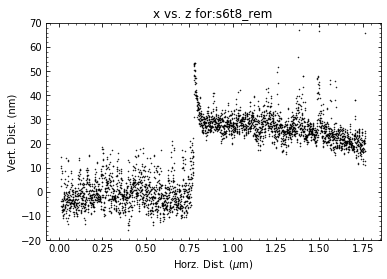

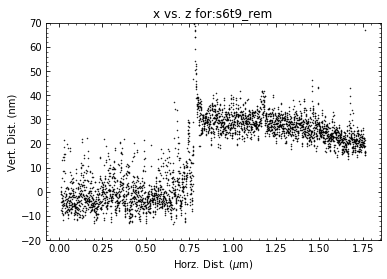

In [20]:
for key in wox:
    if (re.search('s6',key)) and (re.search('rem',key)):
        sf.key_plot(wox,key)
        plt.ylim((-20.,70))

In [19]:
for key in wox:
    if (re.search('s6',key)) and (re.search('h',key)):
        print(key,wox[key])

s6t2_h (34.53783315369047, 2.7231783421981643)
s6t4_h (34.84992933308426, 36.78687189653145)
s6t5_h (35.871872709521526, 13.17404617327853)
s6t6_h (35.164415708700034, 11.986985036626093)
s6t7_h (34.40175497659306, 12.26162871112279)
s6t8_h (28.96922623764077, 7.1287283141659055)
s6t9_h (29.807523456316414, 7.9322096201226655)


In [7]:
for key in wox:
    if (re.search('avg',key)):
        print(wox[key])

(41, 21)
(41, 25)
(33, 11)
(32, 82)
(41, 8)
(30, 50)
(40, 8)
(43, 5)


In [11]:
# the bad scans
bad_wox = np.array(['s1t3','s3t3','s3t4','s3t6','s4t2','s4t3','s4t5','s4t10','s5t2','s5t4','s6t1','s6t3','s7t1','s8t1','s8t3'])
bad_nox = np.array(['s1t5','s2t1','s2t2','s2t4','s2t5','s3t1','s3t2','s3t3','s4t2','s4t4','s4t5','s5t3','s5t4','s5t5','s5t6','s6t1','s6t2','s6t4','s6t5','s7t1','s7t4','s7t5','s8t1','s8t3','s8t5'])

In [8]:
# np.array([key for key in wox if (np.any(bad_wox==key)==False) and (re.search('adj|h|_|avg',key)==None)])
bad_wox_h = np.array([bad_wox[i]+'_h' for i in range(len(bad_wox))])
bad_nox_h = np.array([bad_nox[i]+'_h' for i in range(len(bad_nox))])

In [9]:
good_nox = np.array([key for key in nox if (np.any(bad_nox==key)==False) and (re.search('adj|h|_|avg',key)==None)])
good_wox = np.array([key for key in wox if (np.any(bad_wox==key)==False) and (re.search('adj|h|_|avg',key)==None)])

In [10]:
good_nox_h = np.array([good_nox[i]+'_h' for i in range(len(good_nox))])
good_wox_h = np.array([good_wox[i]+'_h' for i in range(len(good_wox))])

In [11]:
wavg = np.arange(1,9)
wstd = np.zeros_like(wavg)
navg = np.arange(1,9)
nstd = np.zeros_like(navg)
n = np.arange(1,9)

In [12]:
wox_h = np.zeros(len(good_wox_h))
nox_h = np.zeros(len(good_nox_h))
for i in range(len(wox_h)):
    wox_h[i] = wox[good_wox_h[i]][0]
for i in range(len(nox_h)):
    nox_h[i] = nox[good_nox_h[i]][0]

In [13]:
nw = np.array([1,1,1,1,2,2,2,2,3,3,3,4,5,5,5,5,6,6,7,7,7,7,8,8])
nn = np.array([1,1,1,1,2,2,3,3,3,4,4,4,5,5,6,6,7,7,7,8,8])

In [14]:
# new wox avg and std
for i in range(len(n)):
    samp_str = 's'+str(n[i])+'.._h'
    s = 0.
    std = 0.
    cts = 0
    for j in range(len(good_wox_h)):
        if re.search(samp_str,good_wox_h[j]):
            s += wox[good_wox_h[j]][0]
            std += (wox[good_wox_h[j]][1])**2
            cts += 1
    wavg[i] = s/cts
    wstd[i] = np.sqrt(std)

In [15]:
# new nox avg and std
for i in range(len(n)):
    samp_str = 's'+str(n[i])+'.._h'
    s = 0.
    std = 0.
    cts = 0
    for j in range(len(good_nox_h)):
        if re.search(samp_str,good_nox_h[j]):
            s += nox[good_nox_h[j]][0]
            std += (nox[good_nox_h[j]][1])**2
            cts += 1
    navg[i] = s/cts
    nstd[i] = np.sqrt(std)

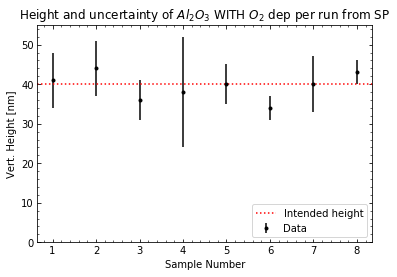

In [16]:
plt.figure();
plt.errorbar(n,wavg,yerr=wstd,fmt='k.',label='Data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0,55.));
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='lower right');
plt.title('Height and uncertainty of $Al_{2}O_{3}$ WITH $O_2$ dep per run from SP');

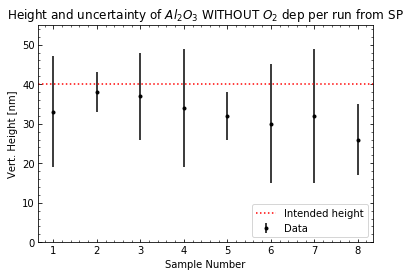

In [17]:
plt.figure();
plt.errorbar(n,navg,yerr=nstd,fmt='k.',label='Data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0,55.));
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='lower right');
plt.title('Height and uncertainty of $Al_{2}O_{3}$ WITHOUT $O_2$ dep per run from SP');

ValueError: x and y must have same first dimension, but have shapes (24,) and (38,)

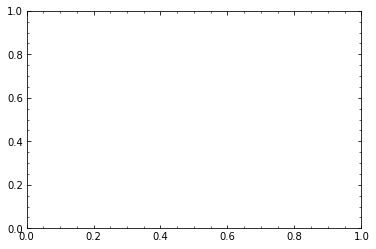

In [29]:
plt.figure();
plt.plot(nw,wox_h,'k.',label='data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0,55));
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='lower right');
plt.title('Height vs sample: each scan in the WITH $O_2$ dataset');

In [ ]:
plt.figure();
plt.plot(nn,nox_h,'k.',label='data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0,55));
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='lower right');
plt.title('Height vs sample: each scan in the WITHOUT $O_2$ dataset');

In [8]:
avgkey_w = np.array([key for key in wox if (re.search('avg',key))])
avgkey_n = np.array([key for key in nox if (re.search('avg',key))])
wox_avg = np.array([wox[avgkey_w[i]][0] for i in range(len(avgkey_w))],dtype=float)
wox_std = np.array([wox[avgkey_w[i]][1] for i in range(len(avgkey_w))],dtype=float)
nox_avg = np.array([nox[avgkey_n[i]][0] for i in range(len(avgkey_n))],dtype=float)
nox_std = np.array([nox[avgkey_n[i]][1] for i in range(len(avgkey_n))],dtype=float)
# plt.errorbar()
n = np.arange(1,9)

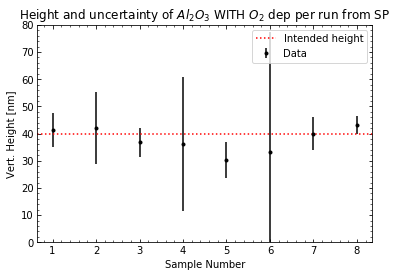

In [9]:
plt.figure();
plt.errorbar(n,wox_avg,yerr=wox_std,fmt='k.',label='Data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0.,80))
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='best');
plt.title('Height and uncertainty of $Al_{2}O_{3}$ WITH $O_2$ dep per run from SP');

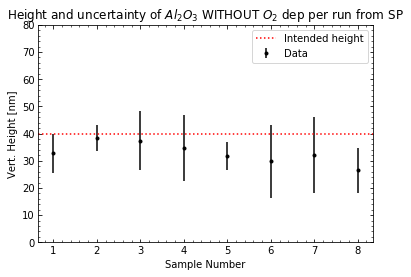

In [10]:
plt.figure();
plt.errorbar(n,nox_avg,yerr=nox_std,fmt='k.',label='Data');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0.,80))
plt.xlabel('Sample Number');
plt.ylabel('Vert. Height [nm]');
plt.legend(loc='best');
plt.title('Height and uncertainty of $Al_{2}O_{3}$ WITHOUT $O_2$ dep per run from SP');

In [ ]:
for key in nox:
    if (re.search('s8t._adj',key)):
        sf.key_plot(nox,key)
    else:
        continue

bad wox scans:

    - s1: t3
    - s2: 
    - s3: t3, t4, t6
    - s4: t1?, t2, t3,t5
    - s5: t2, t3?, t4, 
    - s6: t1, t2?, ALL BAD :( (for now keeping 2,3)
    - s7: t1, 
    - s8: t1?, t3?

bad nox scans:

    - s1: t5
    - s2: t1?, t2, t3?, t4?, t5, t6?
    - s3: t1, t2,t3,
    - s4: t2?, , t4, t5, t6
    - s5: t3, t4, t5, t6
    - s6: t1, t2, t3?, t4, t5
    - s7: t1, t2?, t3?, t4?, t5, t6
    - s8: t1, t2?, t3, t5
    
'?' means look at the scan params, or needs a second eye, or maybe wouldnt suck if it had some outlier removal

In [ ]:
# CHANGE THE OUTPUT OF 'PROJ' FROM TUPLE TO 2 ARRAYS
# testing rms calc
wox_rms = np.zeros_like(wox_key)
nox_rms = np.zeros_like(nox_key)
for i in range(len(wox_key)):
    wox_rms[i] = np.sqrt(np.sum(wox[wox_key[i]+'_adj'][1]**2)/len(wox[wox_key[i]+'_adj'][1]))
for i in range(len(nox_key)):
    nox_rms[i] = np.sqrt(np.sum(nox[nox_key[i]+'_adj'][1]**2)/len(nox[nox_key[i]+'_adj'][1]))

In [ ]:
# rms calculation, try on both raw and proj data
# rms = [(sum(Z(x)^2)/N)]^1/2
def rms(dick,key):
    '''
    calculates the rms of the data, this is the surface roughness
    works with the already established dictionary/sp system
    input:
    z - array, float - a [N,1] array of the vertical heights at each point, N is number of points
    output:
    rms - float - the roughness of the surface
    '''
    if key in dick:
        
    return rms

In [ ]:
# outlier removal

In [ ]:
# data from the woolam fits, so it can be plotted nicely
# with o2 fits from todd
# fits were only against thickness, optical constants were held constant
wof_h = np.array([44.63,38.03,38.13,38.54,39.38,40.17,40.01,40.83]) # height, nm
wof_std = np.array([.04,.02,.02,.02,.02,.02,.02,.02]) # std, nm
wof_mse = np.array([18.75,11.43,10.38,10.15,10.51,10.68,9.66,9.39]) # MSE from fit
wof_pc = np.array([((wof_h[i]-np.mean(wof_h))/np.mean(wof_h))*100 for i in range(len(wof_h))]) # % change from the mean
# without o2 fits from ?? on sheet 2
# NOTE: needs errorbars
nof_h = np.array([36.32,33.46,32.01,33.11,31.49,30.369,29.63,29.03])
nof_pc = np.array([((nof_h[i]-np.mean(nof_h))/np.mean(nof_h))*100 for i in range(len(nof_h))])

In [ ]:
plt.figure();
plt.errorbar(n,wof_h,yerr=wof_std,fmt='b.',label='with $O_2$');
plt.plot(n,nof_h,'r.',markersize=6,label='without $O_2$');
plt.axhline(40.,c='r',ls=':',label='Intended height');
plt.ylim((0,50))
plt.xlabel('Layer Number');
plt.ylabel('Fitted Thickness [nm]');
plt.legend(loc='best');
plt.title('Ellipsometry fitted thicknesses for both trials');

In [ ]:
plt.figure();
plt.plot(n,wof_pc,'b.',markersize=7,label='with $O_2$');
plt.plot(n,nof_pc,'r.',markersize=7,label='without $O_2$');
plt.axhline(0.,c='k',ls=':');
plt.ylim((-15.,15))
plt.xlabel('Layer Number');
plt.ylabel('Change from mean [%]');
plt.legend(loc='best');
plt.title('Change from mean by layer for fitted thicknesses');

In [ ]:
print(nw)
wsc1 = np.zeros_like(nw[:4],dtype=float)
wsc1[:] = wof_h[0]
wsc2 = np.zeros_like(nw[4:8],dtype=float)
wsc2[:] = wof_h[1]
wsc3 = np.zeros_like(nw[8:11],dtype=float)
wsc3[:] = wof_h[2]
wsc4 = np.zeros_like(nw[11],dtype=float)
wsc4 = wof_h[3]
wsc5 = np.zeros_like(nw[12:16],dtype=float)
wsc5[:] = wof_h[4]
wsc6 = np.zeros_like(nw[16:18],dtype=float)
wsc6[:] = wof_h[5]
wsc7 = np.zeros_like(nw[18:22],dtype=float)
wsc7[:] = wof_h[6]
wsc8 = np.zeros_like(nw[22:],dtype=float)
wsc8[:] = wof_h[7]

In [ ]:
# wox_h[:4]
wsc1

In [ ]:
print(nn)
nsc1 = np.zeros_like(nn[:4],dtype=float)
nsc1[:] = nof_h[0]
nsc2 = np.zeros_like(nn[4:6],dtype=float)
nsc2[:] = nof_h[1]
nsc3 = np.zeros_like(nn[6:9],dtype=float)
nsc3[:] = nof_h[2]
nsc4 = np.zeros_like(nn[9:12],dtype=float)
nsc4[:] = nof_h[3]
nsc5 = np.zeros_like(nn[12:14],dtype=float)
nsc5[:] = nof_h[4]
nsc6 = np.zeros_like(nn[14:16],dtype=float)
nsc6[:] = nof_h[5]
nsc7 = np.zeros_like(nn[16:19],dtype=float)
nsc7[:] = nof_h[6]
nsc8 = np.zeros_like(nn[19:],dtype=float)
nsc8[:] = nof_h[7]

In [ ]:
nsc1

In [ ]:
plt.figure();
plt.scatter(wsc1,wox_h[:4],label='layer 1');
plt.scatter(wsc2,wox_h[4:8],label='layer 2');
plt.scatter(wsc3,wox_h[8:11],label='layer 3');
plt.scatter(wsc4,wox_h[11],label='layer 4');
plt.scatter(wsc5,wox_h[12:16],label='layer 5');
plt.scatter(wsc6,wox_h[16:18],label='layer 6');
plt.scatter(wsc7,wox_h[18:22],label='layer 7');
plt.scatter(wsc8,wox_h[22:],label='layer 8');
plt.ylim((0,55.));
plt.xlabel('Fitted thickness [nm]');
plt.ylabel('SP thickness [nm]');
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1));
plt.title('Fitted thickness vs SP thickness by layer WITH $O_2$');

In [ ]:
nsc = np.concatenate((nsc1,nsc2,nsc3,nsc4,nsc5,nsc6,nsc7,nsc8))
(p,c) = opt.curve_fit(sf.linf,nsc,nox_h,p0=[1.,30])

In [ ]:
sf.linf(nox_h,*p).shape

In [ ]:
plt.figure();
plt.scatter(nsc1,nox_h[:4],label='layer 1');
plt.scatter(nsc2,nox_h[4:6],label='layer 2');
plt.scatter(nsc3,nox_h[6:9],label='layer 3');
plt.scatter(nsc4,nox_h[9:12],label='layer 4');
plt.scatter(nsc5,nox_h[12:14],label='layer 5');
plt.scatter(nsc6,nox_h[14:16],label='layer 6');
plt.scatter(nsc7,nox_h[16:19],label='layer 7');
plt.scatter(nsc8,nox_h[19:],label='layer 8');
plt.ylim((0,55.));
plt.xlabel('Fitted thickness [nm]');
plt.ylabel('SP thickness [nm]');
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1));
plt.title('Fitted thickness vs SP thickness by layer WITHOUT $O_2$');

In [ ]:
# todd w O2, with case_al2o3
(tw_th,tw_therr,tw_mse) = np.genfromtxt('C:/Users/afish/Desktop/python_school/research/mach_learn/cauchy_fits.csv',delimiter=',',skip_header=2,usecols=(2,3,15),unpack=True,max_rows=8)
# woolam w O2, indiv cauchy fits
(ww_th,ww_therr,ww_a,ww_b,ww_k,ww_mse) = np.genfromtxt('C:/Users/afish/Desktop/python_school/research/mach_learn/cauchy_fits.csv',delimiter=',',skip_header=11,usecols=(2,3,5,6,7,15),unpack=True,max_rows=8)
# todd wo O2, case_al2o3
(tn_th,tn_therr,tn_mse) = np.genfromtxt('C:/Users/afish/Desktop/python_school/research/mach_learn/cauchy_fits.csv',delimiter=',',skip_header=26,usecols=(2,3,15),unpack=True,max_rows=8)
# woolam wo O2, indiv cauchy fits
(wn_th,wn_therr,wn_a,wn_b,wn_k,wn_mse) = np.genfromtxt('C:/Users/afish/Desktop/python_school/research/mach_learn/cauchy_fits.csv',delimiter=',',skip_header=36,usecols=(2,3,5,6,7,15),unpack=True,max_rows=8)

In [ ]:
x = np.linspace(0.,50)

In [ ]:
plt.figure();
for i in range(len(n)):
    plt.errorbars()
#     plt.scatter(tw_th[i],wavg[i],label='layer: '+str(i+1));
plt.plot(x,sf.linf(x,1,0.),'r:');
plt.xlim((32,45.5));
plt.ylim((32,45.5));
plt.xlabel('Fitted thickness [nm]');
plt.ylabel('SP thickness [nm]');
plt.legend(loc='upper left',bbox_to_anchor=(1.05,1));